In [1]:
#https://www.kaggle.com/code/kcsener/8-recurrent-neural-network-rnn-tutorial
#https://www.kaggle.com/code/prashant111/comprehensive-guide-to-rnn-with-keras
#https://www.kaggle.com/code/mattbast/rnn-and-nlp-detect-a-disaster-in-tweets/notebook

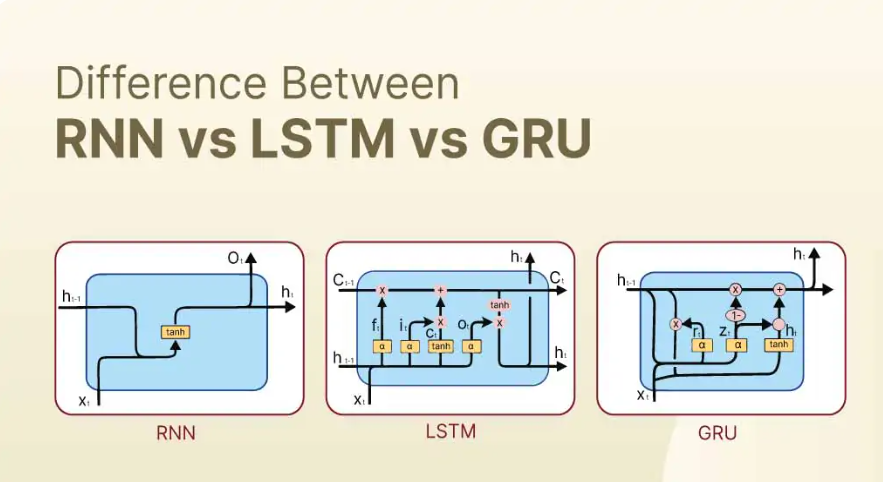

In [2]:
from IPython import display
display.Image("C:/BITsPilaniMTECH2123/Sem3/NLP/NLP_All_Practice/Word2vec_Doc2vec/rnn1.PNG")

### How does RNN work?
### Here is a brief summary of how RNNs work:

### RNNs are neural networks that can process sequential data, such as text, audio, or time series data.
### They contain a “hidden state” that is passed from one element in the sequence to the next, allowing the network to remember information from previous elements.
### At each time step, the RNN takes in an input and the current hidden state, and produces an output and a new hidden state.
### The output and new hidden state are used as input for the next time step, and this process continues until the entire sequence has been processed.
### RNNs are well-suited for tasks involving variable-length sequences and maintaining state across elements.

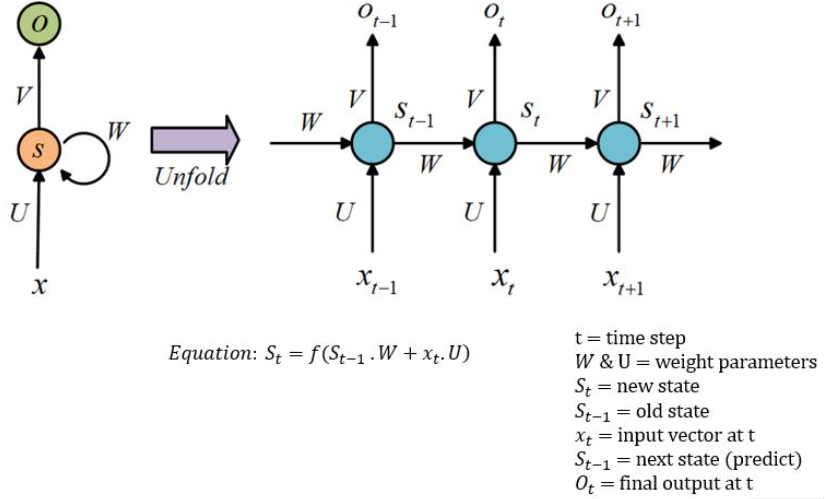

In [4]:
from IPython import display
display.Image("C:/BITsPilaniMTECH2123/Sem3/NLP/NLP_All_Practice/Word2vec_Doc2vec/rnn2.PNG")

### How does LSTM work?
### Here is a brief summary of how Long Short-Term Memory (LSTM) networks work:

### LSTMs are a type of Recurrent Neural Network (RNN) that can better retain long-term dependencies in the data.
### They have a more complex structure than regular RNNs, consisting of input, output, and forget gates that can selectively retain or discard information from the hidden state.
### The input gate determines which information from the current input to store in the hidden state.
### The forget gate determines which information from the previous hidden state to keep or discard.
### The output gate determines which information from the hidden state to output as the final prediction.
### This combination of gates allows LSTMs to retain important information from long sequences and discard irrelevant or outdated information.
### LSTMs are often used for tasks involving long-term dependencies, such as language translation and language modeling.

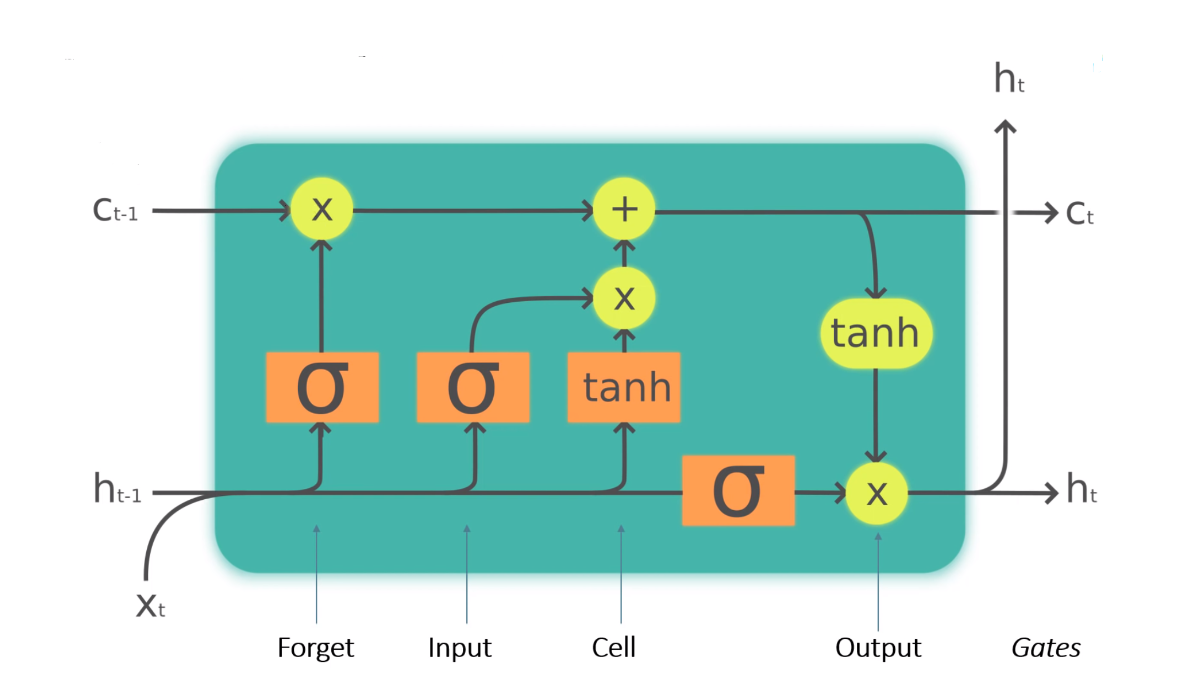

In [5]:
from IPython import display
display.Image("C:/BITsPilaniMTECH2123/Sem3/NLP/NLP_All_Practice/Word2vec_Doc2vec/rnn3.PNG")

### How does GRU work?
### Here is a brief summary of how Gated Recurrent Units (GRUs) work:

### GRUs are a type of Recurrent Neural Network (RNN) that uses a simpler structure than LSTMs and is easier to train.
### They have two gates: an update gate and a reset gate.
### The update gate determines which information from the previous hidden state and current input to keep, and the reset gate determines which information to discard.
### The final hidden state is a combination of the information retained by the update gate and the current input.
### This combination of gates allows GRUs to retain relevant information from long sequences and discard irrelevant or outdated information.
### GRUs are often used for tasks involving sequential data, such as language translation and language modeling.

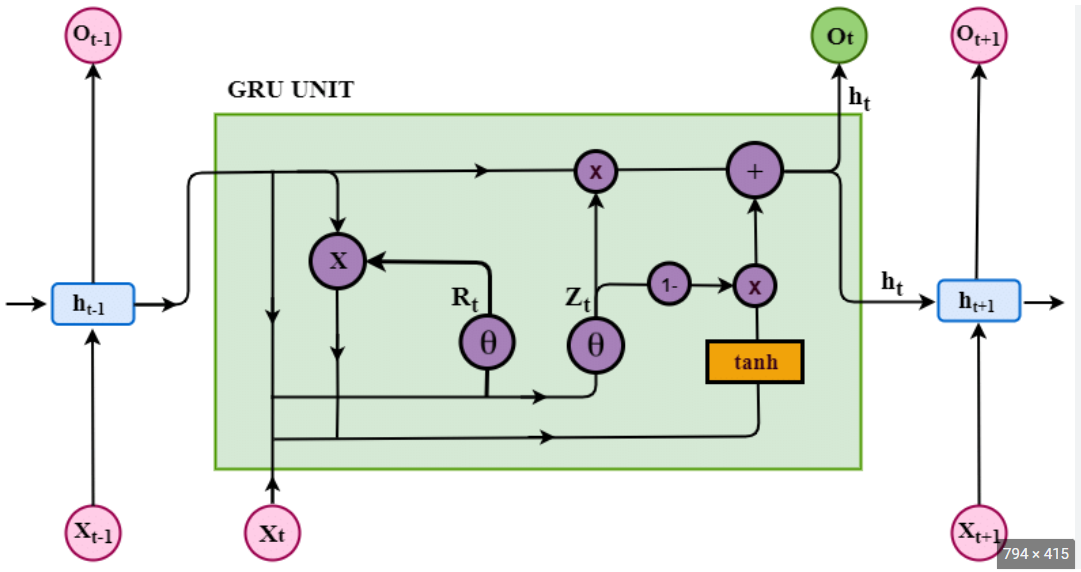

In [6]:
from IPython import display
display.Image("C:/BITsPilaniMTECH2123/Sem3/NLP/NLP_All_Practice/Word2vec_Doc2vec/rnn4.PNG")

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [19]:
#Load data
df = pd.read_csv('C:/BITsPilaniMTECH2123/Sem3/NLP/NLP_All_Practice/Word2vec_Doc2vec/spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [21]:
df['v1']=df['v1'].astype('string')
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [22]:
#Target and Dependent features
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [23]:
#Data split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [24]:
#Process the data
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = tf.keras.preprocessing.sequence.pad_sequences(sequences,maxlen=max_len)

In [26]:
#RNN structure.
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [27]:
#Call the function and compile the model.
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [28]:
#Fit on the training data.
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 14s 300ms/step - loss: 0.3268 - accuracy: 0.8706 - val_loss: 0.1545 - val_accuracy: 0.9441
Epoch 2/10
30/30 [==============================] - 8s 260ms/step - loss: 0.0864 - accuracy: 0.9770 - val_loss: 0.0690 - val_accuracy: 0.9821


In [30]:
#Process the test set data.
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = tf.keras.preprocessing.sequence.pad_sequences(test_sequences,maxlen=max_len)

In [31]:
#Evaluate the model on the test set.
accr = model.evaluate(test_sequences_matrix,Y_test)
accr

27/27 [==============================] - 1s 37ms/step - loss: 0.0713 - accuracy: 0.9821


[0.07129982858896255, 0.9820573925971985]

In [32]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.071
  Accuracy: 0.982


In [35]:
#https://www.kaggle.com/code/arunrk7/nlp-beginner-text-classification-using-lstm

## Gated Recurrent Units

In [36]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [37]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [38]:
# First, we get the data
dataset = pd.read_csv('C:/BITsPilaniMTECH2123/Sem3/NLP/NLP_All_Practice/Word2vec_Doc2vec/IBMdata.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [43]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
print("Train",training_set.shape)
test_set = dataset['2017':].iloc[:,1:2].values
print("Test",test_set.shape)

Train (2768, 1)
Test (251, 1)


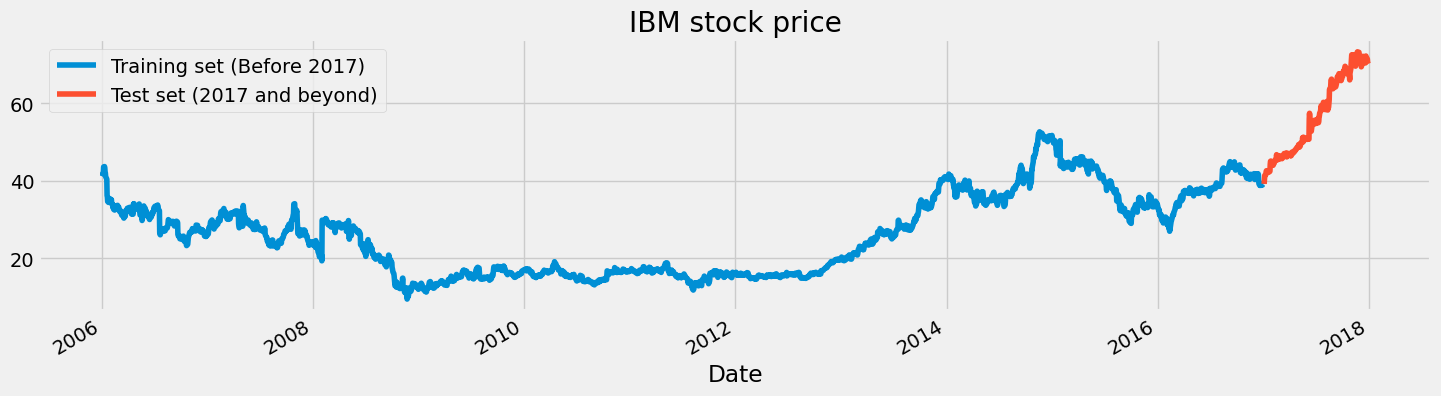

In [44]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [41]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [45]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2768):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [46]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [47]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 26s 134ms/step - loss: 0.0146
Epoch 2/50
85/85 [==============================] - 11s 135ms/step - loss: 0.0070
Epoch 3/50
85/85 [==============================] - 12s 143ms/step - loss: 0.0054
Epoch 4/50
85/85 [==============================] - 12s 140ms/step - loss: 0.0051
Epoch 5/50
85/85 [==============================] - 12s 138ms/step - loss: 0.0043
Epoch 6/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0038
Epoch 7/50
85/85 [==============================] - 11s 132ms/step - loss: 0.0037
Epoch 8/50
85/85 [==============================] - 11s 133ms/step - loss: 0.0034
Epoch 9/50
85/85 [==============================] - 11s 133ms/step - loss: 0.0031
Epoch 10/50
85/85 [==============================] - 12s 136ms/step - loss: 0.0029
Epoch 11/50
85/85 [==============================] - 12s 145ms/step - loss: 0.0028
Epoch 12/50
85/85 [==============================] - 12s 139ms/step - loss: 0.0027
Epoch 13/50
8

In [48]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [49]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 4s 49ms/step


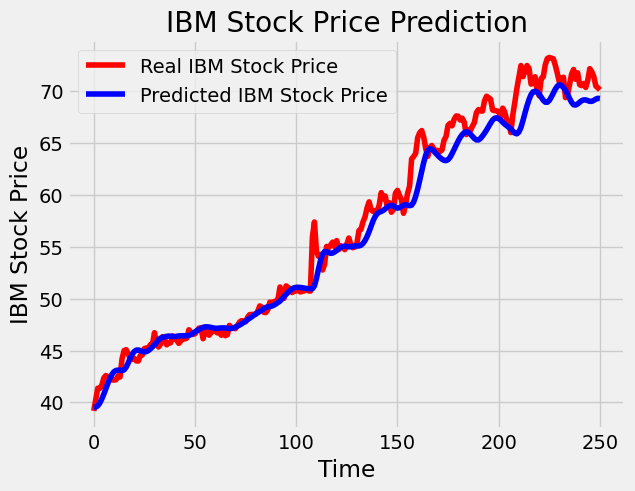

In [50]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [51]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 1.7387029419201954.


In [52]:
## Gated Recurrent Units

In [53]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50


C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


19/19 [==============================] - 22s 411ms/step - loss: 0.0913
Epoch 2/50
19/19 [==============================] - 8s 416ms/step - loss: 0.0313
Epoch 3/50
19/19 [==============================] - 8s 418ms/step - loss: 0.0075
Epoch 4/50
19/19 [==============================] - 8s 424ms/step - loss: 0.0037
Epoch 5/50
19/19 [==============================] - 8s 404ms/step - loss: 0.0032
Epoch 6/50
19/19 [==============================] - 7s 385ms/step - loss: 0.0029
Epoch 7/50
19/19 [==============================] - 7s 347ms/step - loss: 0.0030
Epoch 8/50
19/19 [==============================] - 7s 374ms/step - loss: 0.0028
Epoch 9/50
19/19 [==============================] - 6s 322ms/step - loss: 0.0027
Epoch 10/50
19/19 [==============================] - 7s 364ms/step - loss: 0.0027
Epoch 11/50
19/19 [==============================] - 7s 351ms/step - loss: 0.0025
Epoch 12/50
19/19 [==============================] - 8s 417ms/step - loss: 0.0024
Epoch 13/50
19/19 [================

In [54]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

8/8 [==============================] - 3s 43ms/step


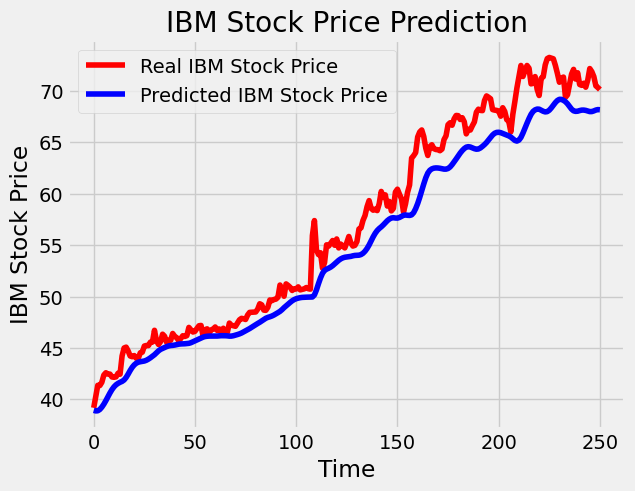

In [55]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [56]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 2.6283300856272755.


In [57]:
#Sequence Generation

In [59]:
# Preparing sequence data
initial_sequence = X_train[2608,:]
sequence = []
for i in range(251):
    new_prediction = regressorGRU.predict(initial_sequence.reshape(initial_sequence.shape[1],initial_sequence.shape[0],1))
    initial_sequence = initial_sequence[1:]
    initial_sequence = np.append(initial_sequence,new_prediction,axis=0)
    sequence.append(new_prediction)
sequence = sc.inverse_transform(np.array(sequence).reshape(251,1))

1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 57ms/step


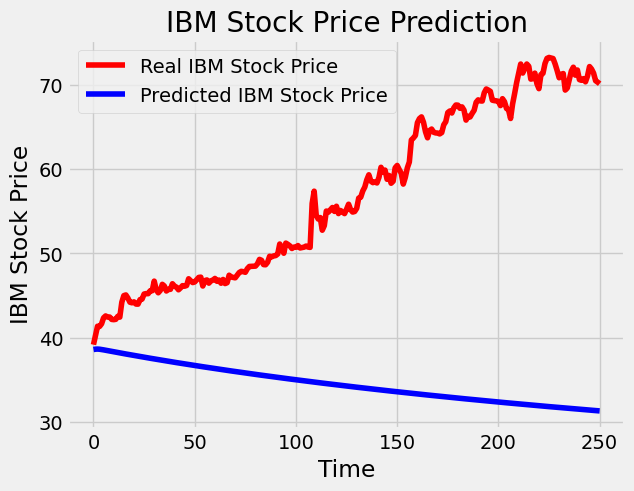

In [60]:
# Visualizing the sequence
plot_predictions(test_set,sequence)

In [ ]:
#https://www.kaggle.com/code/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru/notebook